In [1]:
!pip install -q ultralytics

In [ ]:
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TOKEN")
project = rf.workspace("sajjad-aemmi").project("persian-license-plate-detection")
dataset = project.version(7).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
from ultralytics import YOLO

In [12]:
model = YOLO('yolo11n.pt')

In [13]:
results = model.train(
    data='/content/Persian-License-Plate-Detection-7/data.yaml',
    epochs=50,
    imgsz=256,
    batch=4,
    cache=True)

Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Persian-License-Plate-Detection-7/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train27, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

In [14]:
val_results = model.val()
test_results = model.val(data='/content/Persian-License-Plate-Detection-7/data.yaml', split='test')

print("Validation Results:", val_results)
print("Test Results:", test_results)

Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 410.9±78.9 MB/s, size: 51.4 KB)
val: Scanning /content/Persian-License-Plate-Detection-7/labels/val.cache... 181 images, 5 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 181/181 234.7Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 25, len(boxes) = 415. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.
val: Caching images (0.0GB RAM): 100% ━━━━━━━━━━━━ 181/181 289.7it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━


image 1/1 /content/Persian-License-Plate-Detection-7/images/test/photo_2023-11-07_14-34-47_jpg.rf.bcd55d35872394242ddd40645d7294cb.jpg: 256x256 1 license_plate, 50.5ms
Speed: 2.0ms preprocess, 50.5ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 256)


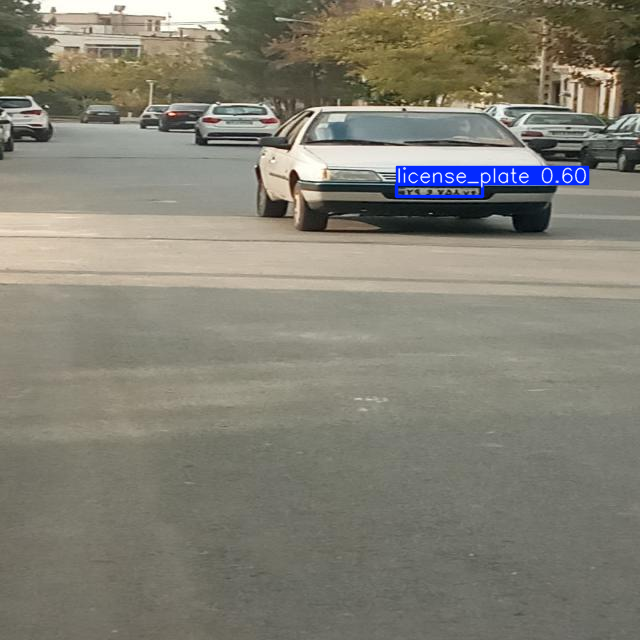

In [17]:
test_image = '/content/Persian-License-Plate-Detection-7/images/test/photo_2023-11-07_14-34-47_jpg.rf.bcd55d35872394242ddd40645d7294cb.jpg'
inference_results = model(test_image)
inference_results[0].show()